

This is a jupyter notebook describing the setup for fast and slow cooling rate of amorphous hydrogenated germanium. For this, we have taken the sample and heated it up to 490K. And then, they were cooled with different cooling rates. 

I am going ot test the hypothesis that claims that the equiliberation temperature for different annealing points.

Fast cool = 12-15K per minute

Slow cool = 1K per minute

During this process, their conductivity was measured. And now here I present their conducitivity with respect to (1000/Temperature)

I will also calculate the ficitve temperature.

For that, first we need some function which I have done below.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import constants as c
import math
from IPython.display import Markdown
import annealed as an

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline



In R1, we can clearly see that the conductivity due to slow and fast cool is almost the same. There is no significant differnt between the value. 

In R2, we can clearly see that the condictivity due to slow cool is higher than that of fast cool. 

Dividing them into these two regions give us an **equiliberation temperature of 474K**.

In R1, they have a straight line representing the conductivity and in R2, after the transition has taken place, slow and fast cool are still straight, but with different slopes.


Now, the expected formula for conductivity with repsect to temperature in such samples is 

$$\sigma = \sigma_0 e^{\left(\frac{-E_a}{K_bT}\right)}$$

$\sigma_0$ and $E_a$ are the initial conductivity and the activation energy of the sample. And we can calculate it seperately for R1 and R2. 



In [3]:
# d480 = an.game("fast and slow cool\\slow cool\\slow cool down 480.csv","fast and slow cool\\fast cool\\fast cool down 480.csv", 480)

# display(Markdown(f'**The activation energy of the system in R1 is** {d480["R1_activation"]}'))
# display(Markdown(f'**The initial conductivity of the system in R1 is** {d480["R1_cond_o"]}'))

# display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {d480["R2_activation_fast"]}'))
# display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {d480["R2_cond_o_fast"]}'))

# display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {d480["R2_activation_slow"]}'))
# display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {d480["R2_cond_o_slow"]}'))

# plt.scatter(d480["thousand_over_temp_slow"], d480["cond_slow"], s=1, color='blue')
# plt.scatter(d480["thousand_over_temp_fast"], d480["cond_fast"], s=1, color='red')

# plt.axvspan(xmin=2.0, xmax=d480["thousand_over_temp_slow"][d480["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/d480["thousand_over_temp_slow"][d480["R1_end_slow"]-1]:.3f}'))
# plt.axvspan(xmin= d480["thousand_over_temp_slow"][d480["R1_end_slow"]-1], xmax=max(max(d480["thousand_over_temp_slow"]), max(d480["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

# plt.text(2.055, max(max(d480["cond_slow"]), max(d480["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
# plt.text(3.0, max(max(d480["cond_slow"]), max(d480["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

# plt.plot(an.x, d480["R1_fit_line_slow"], color='black', label=(f'y = {d480["R1_slope_slow"]:.2f}x + {d480["R1_intercept_slow"]:.2f}, \\n (E_a = {d480["R1_activation"]:.2f}), (cond_o = {d480["R1_cond_o"]:.2f})'))  # Add the fit line to the plot
# plt.plot(an.x, d480["R2_fit_line_slow"], color='blue', label=(f'y = {d480["R2_slope_slow"]:.2f}x + {d480["R2_intercept_slow"]:.2f}, \\n (E_a = {d480["R2_activation_slow"]:.2f}), (cond_o = {d480["R2_cond_o_slow"]:.2f})'))  # Add the fit line to the plot
# plt.plot(an.x, d480["R2_fit_line_fast"], color='red', label=(f'y = {d480["R2_slope_fast"]:.2f}x + {d480["R2_intercept_fast"]:.2f}, \\n (E_a = {d480["R2_activation_fast"]:.2f}), (cond_o = {d480["R2_cond_o_fast"]:.2f})'))  # Add the fit line to the plot

# plt.scatter([d480["pt_slow_x"]], [d480["pt_slow_y"]], color="blue", label= f'fictive temp. slow = {1000/d480["pt_slow_x"]}')
# plt.scatter([d480["pt_fast_x"]], [d480["pt_fast_y"]], color="red", label= f'fictive temp. fast = {1000/d480["pt_fast_x"]}')

# plt.xlabel('1000/Temp') 
# plt.ylabel('Conductivity') 
# plt.title("conductivity vs 1000/temp annealed at 480K") 
# plt.grid(True)
# plt.yscale("log")
# plt.legend()
# plt.show()


189
18


**The activation energy of the system in R1 is** 0.4615992453057687

**The initial conductivity of the system in R1 is** 261.0774983489602

**The activation energy of the system in fast cooling in R2 is** 0.5218653739972341

**The initial conductivity of the system in fast cooling R2 is** 1217.7854974127906

**The activation energy of the system in slow cooling in R2 is** 0.5094452446570195

**The initial conductivity of the system in slow cooling R2 is** 1107.0008477590852

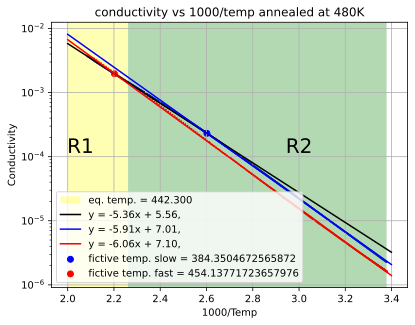

In [7]:
slow_path_480= "fast and slow cool\\slow cool\\slow cool down 480.csv"
d_slow_480 = pd.read_csv(slow_path_480)

fast_path_480 = "fast and slow cool\\fast cool\\fast cool down 480.csv"
d_fast_480 = pd.read_csv(fast_path_480)


d_slow_480.columns = d_slow_480.columns.str.strip()
cond_slow_480 = d_slow_480['Conductivity (Ohm-cm)^-1'] 
thousand_over_temp_slow_480 = 1000/d_slow_480['Temperature (K)']

d_fast_480.columns = d_fast_480.columns.str.strip()
cond_fast_480 = d_fast_480['Conductivity (Ohm-cm)^-1'] 
thousand_over_temp_fast_480 = 1000/d_fast_480['Temperature (K)']

R1_end_slow_480, R1_end_fast_480 = an.same_line_finder(d_slow_480, d_fast_480, err_lim=0.01, forgiveness_num=20)
print(R1_end_slow_480)
print(R1_end_fast_480)

eq_temp_480 = 1000/thousand_over_temp_slow_480[R1_end_slow_480-1]

# R1

R1_cond_slow_480 = cond_slow_480[:R1_end_slow_480] 
R1_thousand_over_temp_slow_480 = thousand_over_temp_slow_480[:R1_end_slow_480]
R1_coefficients_slow_480 = np.polyfit(R1_thousand_over_temp_slow_480, np.log(R1_cond_slow_480), 1)
R1_slope_slow_480 = R1_coefficients_slow_480[0]  # Slope
R1_intercept_slow_480 = R1_coefficients_slow_480[1]  # Intercept
R1_fit_line_slow_480 = np.exp(R1_slope_slow_480 * an.x + R1_intercept_slow_480)

R1_activation_480 = - R1_slope_slow_480 * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R1_cond_o_480 = math.exp(R1_intercept_slow_480)

display(Markdown(f"**The activation energy of the system in R1 is** {R1_activation_480}"))
display(Markdown(f"**The initial conductivity of the system in R1 is** {R1_cond_o_480}"))

# R2
R2_begin_slow_480 = d_slow_480.iloc[(d_slow_480['Temperature (K)'] - 410).abs().argmin()].name
R2_begin_fast_480 = d_fast_480.iloc[(d_fast_480['Temperature (K)'] - 410).abs().argmin()].name

R2_cond_fast_480 = cond_fast_480[R2_begin_fast_480:] 
R2_thousand_over_temp_fast_480 = thousand_over_temp_fast_480[R2_begin_fast_480:]
R2_coefficients_fast_480 = np.polyfit(R2_thousand_over_temp_fast_480, np.log(R2_cond_fast_480), 1)
R2_slope_fast_480 = R2_coefficients_fast_480[0]  
R2_intercept_fast_480 = R2_coefficients_fast_480[1] 
R2_fit_line_fast_480 = np.exp(R2_slope_fast_480 * an.x + R2_intercept_fast_480)
R2_activation_fast_480 = - R2_slope_fast_480 * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R2_cond_o_fast_480 = np.exp(R2_intercept_fast_480)

display(Markdown(f"**The activation energy of the system in fast cooling in R2 is** {R2_activation_fast_480}"))
display(Markdown(f"**The initial conductivity of the system in fast cooling R2 is** {R2_cond_o_fast_480}"))

R2_cond_slow_480 = cond_slow_480[R2_begin_slow_480:] 
R2_thousand_over_temp_slow_480 = thousand_over_temp_slow_480[R2_begin_slow_480:]
R2_coefficients_slow_480 = np.polyfit(R2_thousand_over_temp_slow_480, np.log(R2_cond_slow_480), 1)
R2_slope_slow_480 = R2_coefficients_slow_480[0]  
R2_intercept_slow_480 = R2_coefficients_slow_480[1] 
R2_fit_line_slow_480 = np.exp(R2_slope_slow_480 * an.x + R2_intercept_slow_480)
R2_activation_slow_480 = - R2_slope_slow_480 * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R2_cond_o_slow_480 = np.exp(R2_intercept_slow_480)

display(Markdown(f"**The activation energy of the system in slow cooling in R2 is** {R2_activation_slow_480}"))
display(Markdown(f"**The initial conductivity of the system in slow cooling R2 is** {R2_cond_o_slow_480}"))

plt.scatter(thousand_over_temp_slow_480, cond_slow_480, s=1, color='blue')
plt.scatter(thousand_over_temp_fast_480, cond_fast_480, s=1, color='red')

plt.axvspan(xmin=2.0, xmax=thousand_over_temp_slow_480[R1_end_slow_480-1], facecolor='yellow', alpha=0.3, label= (f"eq. temp. = {1000/thousand_over_temp_slow_480[R1_end_slow_480-1]:.3f}"))
plt.axvspan(xmin=thousand_over_temp_slow_480[R1_end_slow_480-1], xmax=max(max(thousand_over_temp_slow_480), max(thousand_over_temp_fast_480)), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(cond_slow_480), max(cond_fast_480)) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(cond_slow_480), max(cond_fast_480)) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, R1_fit_line_slow_480, color='black', label=(f"y = {R1_slope_slow_480:.2f}x + {R1_intercept_slow_480:.2f}, "))#\\n (E_a = {R1_activation_480:.2f}), (cond_o = {R1_cond_o_480:.2f})"))  # Add the fit line to the plot
plt.plot(an.x, R2_fit_line_slow_480, color='blue', label=(f"y = {R2_slope_slow_480:.2f}x + {R2_intercept_slow_480:.2f}, "))#\\n (E_a = {R2_activation_slow_480:.2f}), (cond_o = {R2_cond_o_slow_480:.2f})"))  # Add the fit line to the plot
plt.plot(an.x, R2_fit_line_fast_480, color='red', label=(f"y = {R2_slope_fast_480:.2f}x + {R2_intercept_fast_480:.2f}, " ))#\\n (E_a = {R2_activation_fast_480:.2f}), (cond_o = {R2_cond_o_fast_480:.2f})"))  # Add the fit line to the plot


pt_slow_x_480, pt_slow_y_480 = an.intersection(R1_slope_slow_480, R1_intercept_slow_480, R2_slope_slow_480, R2_intercept_slow_480)
pt_fast_x_480, pt_fast_y_480 = an.intersection(R1_slope_slow_480, R1_intercept_slow_480, R2_slope_fast_480, R2_intercept_fast_480)
fictive_temp_slow_480 = 1000/pt_slow_x_480
fictive_temp_fast_480 = 1000/pt_fast_x_480

plt.scatter([pt_slow_x_480], [pt_slow_y_480], color="blue", label= f"fictive temp. slow = {1000/pt_slow_x_480}")
plt.scatter([pt_fast_x_480], [pt_fast_y_480], color="red", label= f"fictive temp. fast = {1000/pt_fast_x_480}")
plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 480K") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()


631
637


**The activation energy of the system in R1 is** 0.5053936317918848

**The initial conductivity of the system in R1 is** 969.910608018954

**The activation energy of the system in fast cooling in R2 is** 0.4760634999157286

**The initial conductivity of the system in fast cooling R2 is** 379.527247925909

**The activation energy of the system in slow cooling in R2 is** 0.4200021699179124

**The initial conductivity of the system in slow cooling R2 is** 93.75545261078751

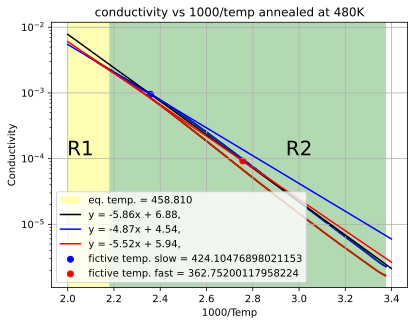

In [8]:
slow_path_480= "fast and slow cool\\slow cool\\slow cool up 480.csv"
d_slow_480 = pd.read_csv(slow_path_480)

fast_path_480 = "fast and slow cool\\fast cool\\fast cool up 480.csv"
d_fast_480 = pd.read_csv(fast_path_480)


d_slow_480.columns = d_slow_480.columns.str.strip()
cond_slow_480 = d_slow_480['Conductivity (Ohm-cm)^-1'] 
thousand_over_temp_slow_480 = 1000/d_slow_480['Temperature (K)']

d_fast_480.columns = d_fast_480.columns.str.strip()
cond_fast_480 = d_fast_480['Conductivity (Ohm-cm)^-1'] 
thousand_over_temp_fast_480 = 1000/d_fast_480['Temperature (K)']

R1_end_slow_480, R1_end_fast_480 = an.same_line_finder(d_slow_480, d_fast_480, err_lim=0.01, forgiveness_num=20)
print(R1_end_slow_480)
print(R1_end_fast_480)

eq_temp_480 = 1000/thousand_over_temp_slow_480[R1_end_slow_480-1]

# R1

R1_cond_slow_480 = cond_slow_480[:R1_end_slow_480] 
R1_thousand_over_temp_slow_480 = thousand_over_temp_slow_480[:R1_end_slow_480]
R1_coefficients_slow_480 = np.polyfit(R1_thousand_over_temp_slow_480, np.log(R1_cond_slow_480), 1)
R1_slope_slow_480 = R1_coefficients_slow_480[0]  # Slope
R1_intercept_slow_480 = R1_coefficients_slow_480[1]  # Intercept
R1_fit_line_slow_480 = np.exp(R1_slope_slow_480 * an.x + R1_intercept_slow_480)

R1_activation_480 = - R1_slope_slow_480 * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R1_cond_o_480 = math.exp(R1_intercept_slow_480)

display(Markdown(f"**The activation energy of the system in R1 is** {R1_activation_480}"))
display(Markdown(f"**The initial conductivity of the system in R1 is** {R1_cond_o_480}"))

# R2
R2_begin_slow_480 = d_slow_480.iloc[(d_slow_480['Temperature (K)'] - 410).abs().argmin()].name
R2_begin_fast_480 = d_fast_480.iloc[(d_fast_480['Temperature (K)'] - 410).abs().argmin()].name

R2_cond_fast_480 = cond_fast_480[R2_begin_fast_480:] 
R2_thousand_over_temp_fast_480 = thousand_over_temp_fast_480[R2_begin_fast_480:]
R2_coefficients_fast_480 = np.polyfit(R2_thousand_over_temp_fast_480, np.log(R2_cond_fast_480), 1)
R2_slope_fast_480 = R2_coefficients_fast_480[0]  
R2_intercept_fast_480 = R2_coefficients_fast_480[1] 
R2_fit_line_fast_480 = np.exp(R2_slope_fast_480 * an.x + R2_intercept_fast_480)
R2_activation_fast_480 = - R2_slope_fast_480 * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R2_cond_o_fast_480 = np.exp(R2_intercept_fast_480)

display(Markdown(f"**The activation energy of the system in fast cooling in R2 is** {R2_activation_fast_480}"))
display(Markdown(f"**The initial conductivity of the system in fast cooling R2 is** {R2_cond_o_fast_480}"))

R2_cond_slow_480 = cond_slow_480[R2_begin_slow_480:] 
R2_thousand_over_temp_slow_480 = thousand_over_temp_slow_480[R2_begin_slow_480:]
R2_coefficients_slow_480 = np.polyfit(R2_thousand_over_temp_slow_480, np.log(R2_cond_slow_480), 1)
R2_slope_slow_480 = R2_coefficients_slow_480[0]  
R2_intercept_slow_480 = R2_coefficients_slow_480[1] 
R2_fit_line_slow_480 = np.exp(R2_slope_slow_480 * an.x + R2_intercept_slow_480)
R2_activation_slow_480 = - R2_slope_slow_480 * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R2_cond_o_slow_480 = np.exp(R2_intercept_slow_480)

display(Markdown(f"**The activation energy of the system in slow cooling in R2 is** {R2_activation_slow_480}"))
display(Markdown(f"**The initial conductivity of the system in slow cooling R2 is** {R2_cond_o_slow_480}"))

plt.scatter(thousand_over_temp_slow_480, cond_slow_480, s=1, color='blue')
plt.scatter(thousand_over_temp_fast_480, cond_fast_480, s=1, color='red')

plt.axvspan(xmin=2.0, xmax=thousand_over_temp_slow_480[R1_end_slow_480-1], facecolor='yellow', alpha=0.3, label= (f"eq. temp. = {1000/thousand_over_temp_slow_480[R1_end_slow_480-1]:.3f}"))
plt.axvspan(xmin=thousand_over_temp_slow_480[R1_end_slow_480-1], xmax=max(max(thousand_over_temp_slow_480), max(thousand_over_temp_fast_480)), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(cond_slow_480), max(cond_fast_480)) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(cond_slow_480), max(cond_fast_480)) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, R1_fit_line_slow_480, color='black', label=(f"y = {R1_slope_slow_480:.2f}x + {R1_intercept_slow_480:.2f}, "))#\\n (E_a = {R1_activation_480:.2f}), (cond_o = {R1_cond_o_480:.2f})"))  # Add the fit line to the plot
plt.plot(an.x, R2_fit_line_slow_480, color='blue', label=(f"y = {R2_slope_slow_480:.2f}x + {R2_intercept_slow_480:.2f}, "))#\\n (E_a = {R2_activation_slow_480:.2f}), (cond_o = {R2_cond_o_slow_480:.2f})"))  # Add the fit line to the plot
plt.plot(an.x, R2_fit_line_fast_480, color='red', label=(f"y = {R2_slope_fast_480:.2f}x + {R2_intercept_fast_480:.2f}, " ))#\\n (E_a = {R2_activation_fast_480:.2f}), (cond_o = {R2_cond_o_fast_480:.2f})"))  # Add the fit line to the plot


pt_slow_x_480, pt_slow_y_480 = an.intersection(R1_slope_slow_480, R1_intercept_slow_480, R2_slope_slow_480, R2_intercept_slow_480)
pt_fast_x_480, pt_fast_y_480 = an.intersection(R1_slope_slow_480, R1_intercept_slow_480, R2_slope_fast_480, R2_intercept_fast_480)
fictive_temp_slow_480 = 1000/pt_slow_x_480
fictive_temp_fast_480 = 1000/pt_fast_x_480

plt.scatter([pt_slow_x_480], [pt_slow_y_480], color="blue", label= f"fictive temp. slow = {1000/pt_slow_x_480}")
plt.scatter([pt_fast_x_480], [pt_fast_y_480], color="red", label= f"fictive temp. fast = {1000/pt_fast_x_480}")
plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 480K") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

In [6]:
slow_path_480= "fast and slow cool\\slow cool\\slow cool up 480.csv"
d_slow_480 = pd.read_csv(slow_path_480)

fast_path_480 = "fast and slow cool\\fast cool\\fast cool up 480.csv"
d_fast_480 = pd.read_csv(fast_path_480)


d_slow_480.columns = d_slow_480.columns.str.strip()
cond_slow_480 = d_slow_480['Conductivity (Ohm-cm)^-1'] 
thousand_over_temp_slow_480 = 1000/d_slow_480['Temperature (K)']

d_fast_480.columns = d_fast_480.columns.str.strip()
cond_fast_480 = d_fast_480['Conductivity (Ohm-cm)^-1'] 
thousand_over_temp_fast_480 = 1000/d_fast_480['Temperature (K)']

R1_end_slow_480, R1_end_fast_480 = an.same_line_finder(d_slow_480, d_fast_480, err_lim=0.01, forgiveness_num=20)
print(R1_end_slow_480)
print(R1_end_fast_480)

eq_temp_480 = 1000/thousand_over_temp_slow_480[R1_end_slow_480-1]

# R1

R1_cond_slow_480 = cond_slow_480[:R1_end_slow_480] 
R1_thousand_over_temp_slow_480 = thousand_over_temp_slow_480[:R1_end_slow_480]
R1_coefficients_slow_480 = np.polyfit(R1_thousand_over_temp_slow_480, np.log(R1_cond_slow_480), 1)
R1_slope_slow_480 = R1_coefficients_slow_480[0]  # Slope
R1_intercept_slow_480 = R1_coefficients_slow_480[1]  # Intercept
R1_fit_line_slow_480 = np.exp(R1_slope_slow_480 * an.x + R1_intercept_slow_480)

R1_activation_480 = - R1_slope_slow_480 * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R1_cond_o_480 = math.exp(R1_intercept_slow_480)

display(Markdown(f"**The activation energy of the system in R1 is** {R1_activation_480}"))
display(Markdown(f"**The initial conductivity of the system in R1 is** {R1_cond_o_480}"))

# R2
R2_begin_slow_480 = d_slow_480.iloc[(d_slow_480['Temperature (K)'] - 410).abs().argmin()].name
R2_begin_fast_480 = d_fast_480.iloc[(d_fast_480['Temperature (K)'] - 410).abs().argmin()].name

R2_cond_fast_480 = cond_fast_480[R2_begin_fast_480:] 
R2_thousand_over_temp_fast_480 = thousand_over_temp_fast_480[R2_begin_fast_480:]
R2_coefficients_fast_480 = np.polyfit(R2_thousand_over_temp_fast_480, np.log(R2_cond_fast_480), 1)
R2_slope_fast_480 = R2_coefficients_fast_480[0]  
R2_intercept_fast_480 = R2_coefficients_fast_480[1] 
R2_fit_line_fast_480 = np.exp(R2_slope_fast_480 * an.x + R2_intercept_fast_480)
R2_activation_fast_480 = - R2_slope_fast_480 * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R2_cond_o_fast_480 = np.exp(R2_intercept_fast_480)

display(Markdown(f"**The activation energy of the system in fast cooling in R2 is** {R2_activation_fast_480}"))
display(Markdown(f"**The initial conductivity of the system in fast cooling R2 is** {R2_cond_o_fast_480}"))

R2_cond_slow_480 = cond_slow_480[R2_begin_slow_480:] 
R2_thousand_over_temp_slow_480 = thousand_over_temp_slow_480[R2_begin_slow_480:]
R2_coefficients_slow_480 = np.polyfit(R2_thousand_over_temp_slow_480, np.log(R2_cond_slow_480), 1)
R2_slope_slow_480 = R2_coefficients_slow_480[0]  
R2_intercept_slow_480 = R2_coefficients_slow_480[1] 
R2_fit_line_slow_480 = np.exp(R2_slope_slow_480 * an.x + R2_intercept_slow_480)
R2_activation_slow_480 = - R2_slope_slow_480 * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R2_cond_o_slow_480 = np.exp(R2_intercept_slow_480)

display(Markdown(f"**The activation energy of the system in slow cooling in R2 is** {R2_activation_slow_480}"))
display(Markdown(f"**The initial conductivity of the system in slow cooling R2 is** {R2_cond_o_slow_480}"))

plt.scatter(thousand_over_temp_slow_480, cond_slow_480, s=1, color='blue')
plt.scatter(thousand_over_temp_fast_480, cond_fast_480, s=1, color='red')

plt.axvspan(xmin=2.0, xmax=thousand_over_temp_slow_480[R1_end_slow_480-1], facecolor='yellow', alpha=0.3, label= (f"eq. temp. = {1000/thousand_over_temp_slow_480[R1_end_slow_480-1]:.3f}"))
plt.axvspan(xmin=thousand_over_temp_slow_480[R1_end_slow_480-1], xmax=max(max(thousand_over_temp_slow_480), max(thousand_over_temp_fast_480)), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(cond_slow_480), max(cond_fast_480)) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(cond_slow_480), max(cond_fast_480)) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, R1_fit_line_slow_480, color='black', label=(f"y = {R1_slope_slow_480:.2f}x + {R1_intercept_slow_480:.2f}, "))#\\n (E_a = {R1_activation_480:.2f}), (cond_o = {R1_cond_o_480:.2f})"))  # Add the fit line to the plot
plt.plot(an.x, R2_fit_line_slow_480, color='blue', label=(f"y = {R2_slope_slow_480:.2f}x + {R2_intercept_slow_480:.2f}, "))#\\n (E_a = {R2_activation_slow_480:.2f}), (cond_o = {R2_cond_o_slow_480:.2f})"))  # Add the fit line to the plot
plt.plot(an.x, R2_fit_line_fast_480, color='red', label=(f"y = {R2_slope_fast_480:.2f}x + {R2_intercept_fast_480:.2f}, " ))#\\n (E_a = {R2_activation_fast_480:.2f}), (cond_o = {R2_cond_o_fast_480:.2f})"))  # Add the fit line to the plot


pt_slow_x_480, pt_slow_y_480 = an.intersection(R1_slope_slow_480, R1_intercept_slow_480, R2_slope_slow_480, R2_intercept_slow_480)
pt_fast_x_480, pt_fast_y_480 = an.intersection(R1_slope_slow_480, R1_intercept_slow_480, R2_slope_fast_480, R2_intercept_fast_480)
fictive_temp_slow_480 = 1000/pt_slow_x_480
fictive_temp_fast_480 = 1000/pt_fast_x_480

plt.scatter([pt_slow_x_480], [pt_slow_y_480], color="blue", label= f"fictive temp. slow = {1000/pt_slow_x_480}")
plt.scatter([pt_fast_x_480], [pt_fast_y_480], color="red", label= f"fictive temp. fast = {1000/pt_fast_x_480}")
plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 480K") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'slow and fast cool data\\slow cool\\slow_cool_at_460.csv'

In [ ]:
slow_path_450= "slow and fast cool data\\slow cool\\slow_cool_at_450.csv"
d_slow_450 = pd.read_csv(slow_path_450)

fast_path_450 = "slow and fast cool data\\fast cool\\fast_cool_at_450.csv"
d_fast_450 = pd.read_csv(fast_path_450)

d_slow_450.columns = d_slow_450.columns.str.strip()
cond_slow_450 = d_slow_450['Conductivity (Ohm-cm)^-1'] 
thousand_over_temp_slow_450 = 1000/d_slow_450['Temperature (K)']

d_fast_450.columns = d_fast_450.columns.str.strip()
cond_fast_450 = d_fast_450['Conductivity (Ohm-cm)^-1'] 
thousand_over_temp_fast_450 = 1000/d_fast_450['Temperature (K)']

R1_end_slow_450, R1_end_fast_450 = an.same_line_finder(d_slow_450, d_fast_450)

eq_temp_450 = 1000/thousand_over_temp_slow_450[R1_end_slow_450-1]

# R1

R1_cond_slow_450 = cond_slow_450[:R1_end_slow_450] 
R1_thousand_over_temp_slow_450 = thousand_over_temp_slow_450[:R1_end_slow_450]
R1_coefficients_slow_450 = np.polyfit(R1_thousand_over_temp_slow_450, np.log(R1_cond_slow_450), 1)
R1_slope_slow_450 = R1_coefficients_slow_450[0]  # Slope
R1_intercept_slow_450 = R1_coefficients_slow_450[1]  # Intercept
R1_fit_line_slow_450 = np.exp(R1_slope_slow_450 * x + R1_intercept_slow_450)

R1_activation_450 = - R1_slope_slow_450 * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R1_cond_o_450 = math.exp(R1_intercept_slow_450)

display(Markdown(f"**The activation energy of the system in R1 is** {R1_activation_450}"))
display(Markdown(f"**The initial conductivity of the system in R1 is** {R1_cond_o_450}"))

# R2
R2_begin_slow_450 = d_slow_450.iloc[(d_slow_450['Temperature (K)'] - 410).abs().argmin()].name
R2_begin_fast_450 = d_fast_450.iloc[(d_fast_450['Temperature (K)'] - 410).abs().argmin()].name

R2_cond_fast_450 = cond_fast_450[R2_begin_fast_450:] 
R2_thousand_over_temp_fast_450 = thousand_over_temp_fast_450[R2_begin_fast_450:]
R2_coefficients_fast_450 = np.polyfit(R2_thousand_over_temp_fast_450, np.log(R2_cond_fast_450), 1)
R2_slope_fast_450 = R2_coefficients_fast_450[0]  
R2_intercept_fast_450 = R2_coefficients_fast_450[1] 
R2_fit_line_fast_450 = np.exp(R2_slope_fast_450 * x + R2_intercept_fast_450)
R2_activation_fast_450 = - R2_slope_fast_450 * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R2_cond_o_fast_450 = np.exp(R2_intercept_fast_450)

display(Markdown(f"**The activation energy of the system in fast cooling in R2 is** {R2_activation_fast_450}"))
display(Markdown(f"**The initial conductivity of the system in fast cooling R2 is** {R2_cond_o_fast_450}"))

R2_cond_slow_450 = cond_slow_450[R2_begin_slow_450:] 
R2_thousand_over_temp_slow_450 = thousand_over_temp_slow_450[R2_begin_slow_450:]
R2_coefficients_slow_450 = np.polyfit(R2_thousand_over_temp_slow_450, np.log(R2_cond_slow_450), 1)
R2_slope_slow_450 = R2_coefficients_slow_450[0]  
R2_intercept_slow_450 = R2_coefficients_slow_450[1] 
R2_fit_line_slow_450 = np.exp(R2_slope_slow_450 * x + R2_intercept_slow_450)
R2_activation_slow_450 = - R2_slope_slow_450 * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R2_cond_o_slow_450 = np.exp(R2_intercept_slow_450)

display(Markdown(f"**The activation energy of the system in slow cooling in R2 is** {R2_activation_slow_450}"))
display(Markdown(f"**The initial conductivity of the system in slow cooling R2 is** {R2_cond_o_slow_450}"))

plt.scatter(thousand_over_temp_slow_450, cond_slow_450, s=1, color='blue')
plt.scatter(thousand_over_temp_fast_450, cond_fast_450, s=1, color='red')

plt.axvspan(xmin=2.0, xmax=thousand_over_temp_slow_450[R1_end_slow_450-1], facecolor='yellow', alpha=0.3, label= (f"eq. temp. = {1000/thousand_over_temp_slow_450[R1_end_slow_450-1]:.3f}"))
plt.axvspan(xmin=thousand_over_temp_slow_450[R1_end_slow_450-1], xmax=max(max(thousand_over_temp_slow_450), max(thousand_over_temp_fast_450)), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(cond_slow_450), max(cond_fast_450)) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(cond_slow_450), max(cond_fast_450)) * 0.03, 'R2', fontsize=20, color='black', ha='center')

# plt.plot(x, R1_fit_line_slow_450, color='black', label=(f"y = {R1_slope_slow_450:.2f}x + {R1_intercept_slow_450:.2f}, "))#\\n (E_a = {R1_activation_450:.2f}), (cond_o = {R1_cond_o_450:.2f})"))  # Add the fit line to the plot
# plt.plot(x, R2_fit_line_slow_450, color='blue', label=(f"y = {R2_slope_slow_450:.2f}x + {R2_intercept_slow_450:.2f}, "))#\\n (E_a = {R2_activation_slow_450:.2f}), (cond_o = {R2_cond_o_slow_450:.2f})"))  # Add the fit line to the plot
# plt.plot(x, R2_fit_line_fast_450, color='red', label=(f"y = {R2_slope_fast_450:.2f}x + {R2_intercept_fast_450:.2f}, " ))#\\n (E_a = {R2_activation_fast_450:.2f}), (cond_o = {R2_cond_o_fast_450:.2f})"))  # Add the fit line to the plot


pt_slow_x_450, pt_slow_y_450 = an.intersection(R1_slope_slow_450, R1_intercept_slow_450, R2_slope_slow_450, R2_intercept_slow_450)
pt_fast_x_450, pt_fast_y_450 = an.intersection(R1_slope_slow_450, R1_intercept_slow_450, R2_slope_fast_450, R2_intercept_fast_450)
fictive_temp_slow_450 = 1000/pt_slow_x_450
fictive_temp_fast_450 = 1000/pt_fast_x_450

# plt.scatter([pt_slow_x_450], [pt_slow_y_450], color="blue", label= f"fictive temp. slow = {1000/pt_slow_x_450}")
# plt.scatter([pt_fast_x_450], [pt_fast_y_450], color="red", label= f"fictive temp. fast = {1000/pt_fast_x_450}")
plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 450K") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()


In [ ]:
slow_path_470_2_hrs= "slow and fast cool data\\slow cool\\slow_cool_at_470_2_hrs.csv"
d_slow_470_2_hrs = pd.read_csv(slow_path_470_2_hrs)

fast_path_470_2_hrs = "slow and fast cool data\\fast cool\\fast_cool_at_470_2_hrs.csv"
d_fast_470_2_hrs = pd.read_csv(fast_path_470_2_hrs)

d_slow_470_2_hrs.columns = d_slow_470_2_hrs.columns.str.strip()
cond_slow_470_2_hrs = d_slow_470_2_hrs['Conductivity (Ohm-cm)^-1'] 
thousand_over_temp_slow_470_2_hrs = 1000/d_slow_470_2_hrs['Temperature (K)']

d_fast_470_2_hrs.columns = d_fast_470_2_hrs.columns.str.strip()
cond_fast_470_2_hrs = d_fast_470_2_hrs['Conductivity (Ohm-cm)^-1'] 
thousand_over_temp_fast_470_2_hrs = 1000/d_fast_470_2_hrs['Temperature (K)']

R1_end_slow_470_2_hrs, R1_end_fast_470_2_hrs = an.(d_slow_470_2_hrs, d_fast_470_2_hrs)

eq_temp_470_2_hrs = 1000/thousand_over_temp_slow_470_2_hrs[R1_end_slow_470_2_hrs-1]
# R1

R1_cond_slow_470_2_hrs = cond_slow_470_2_hrs[:R1_end_slow_470_2_hrs] 
R1_thousand_over_temp_slow_470_2_hrs = thousand_over_temp_slow_470_2_hrs[:R1_end_slow_470_2_hrs]
R1_coefficients_slow_470_2_hrs = np.polyfit(R1_thousand_over_temp_slow_470_2_hrs, np.log(R1_cond_slow_470_2_hrs), 1)
R1_slope_slow_470_2_hrs = R1_coefficients_slow_470_2_hrs[0]  # Slope
R1_intercept_slow_470_2_hrs = R1_coefficients_slow_470_2_hrs[1]  # Intercept
R1_fit_line_slow_470_2_hrs = np.exp(R1_slope_slow_470_2_hrs * x + R1_intercept_slow_470_2_hrs)

R1_activation_470_2_hrs = - R1_slope_slow_470_2_hrs * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R1_cond_o_470_2_hrs = math.exp(R1_intercept_slow_470_2_hrs)

display(Markdown(f"**The activation energy of the system in R1 is** {R1_activation_470_2_hrs}"))
display(Markdown(f"**The initial conductivity of the system in R1 is** {R1_cond_o_470_2_hrs}"))

# R2
R2_begin_slow_470_2_hrs = d_slow_470_2_hrs.iloc[(d_slow_470_2_hrs['Temperature (K)'] - 410).abs().argmin()].name
R2_begin_fast_470_2_hrs = d_fast_470_2_hrs.iloc[(d_fast_470_2_hrs['Temperature (K)'] - 410).abs().argmin()].name

R2_cond_fast_470_2_hrs = cond_fast_470_2_hrs[R2_begin_fast_470_2_hrs:] 
R2_thousand_over_temp_fast_470_2_hrs = thousand_over_temp_fast_470_2_hrs[R2_begin_fast_470_2_hrs:]
R2_coefficients_fast_470_2_hrs = np.polyfit(R2_thousand_over_temp_fast_470_2_hrs, np.log(R2_cond_fast_470_2_hrs), 1)
R2_slope_fast_470_2_hrs = R2_coefficients_fast_470_2_hrs[0]  
R2_intercept_fast_470_2_hrs = R2_coefficients_fast_470_2_hrs[1] 
R2_fit_line_fast_470_2_hrs = np.exp(R2_slope_fast_470_2_hrs * x + R2_intercept_fast_470_2_hrs)
R2_activation_fast_470_2_hrs = - R2_slope_fast_470_2_hrs * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R2_cond_o_fast_470_2_hrs = np.exp(R2_intercept_fast_470_2_hrs)

display(Markdown(f"**The activation energy of the system in fast cooling in R2 is** {R2_activation_fast_470_2_hrs}"))
display(Markdown(f"**The initial conductivity of the system in fast cooling R2 is** {R2_cond_o_fast_470_2_hrs}"))

R2_cond_slow_470_2_hrs = cond_slow_470_2_hrs[R2_begin_slow_470_2_hrs:] 
R2_thousand_over_temp_slow_470_2_hrs = thousand_over_temp_slow_470_2_hrs[R2_begin_slow_470_2_hrs:]
R2_coefficients_slow_470_2_hrs = np.polyfit(R2_thousand_over_temp_slow_470_2_hrs, np.log(R2_cond_slow_470_2_hrs), 1)
R2_slope_slow_470_2_hrs = R2_coefficients_slow_470_2_hrs[0]  
R2_intercept_slow_470_2_hrs = R2_coefficients_slow_470_2_hrs[1] 
R2_fit_line_slow_470_2_hrs = np.exp(R2_slope_slow_470_2_hrs * x + R2_intercept_slow_470_2_hrs)
R2_activation_slow_470_2_hrs = - R2_slope_slow_470_2_hrs * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R2_cond_o_slow_470_2_hrs = np.exp(R2_intercept_slow_470_2_hrs)

display(Markdown(f"**The activation energy of the system in slow cooling in R2 is** {R2_activation_slow_470_2_hrs}"))
display(Markdown(f"**The initial conductivity of the system in slow cooling R2 is** {R2_cond_o_slow_470_2_hrs}"))

plt.scatter(thousand_over_temp_slow_470_2_hrs, cond_slow_470_2_hrs, s=1, color='blue')
plt.scatter(thousand_over_temp_fast_470_2_hrs, cond_fast_470_2_hrs, s=1, color='red')

plt.axvspan(xmin=2.0, xmax=thousand_over_temp_slow_470_2_hrs[R1_end_slow_470_2_hrs-1], facecolor='yellow', alpha=0.3, label= (f"eq. temp. = {eq_temp_470_2_hrs:.3f}"))
plt.axvspan(xmin=thousand_over_temp_slow_470_2_hrs[R1_end_slow_470_2_hrs-1], xmax=max(max(thousand_over_temp_slow_470_2_hrs), max(thousand_over_temp_fast_470_2_hrs)), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(cond_slow_470_2_hrs), max(cond_fast_470_2_hrs)) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(cond_slow_470_2_hrs), max(cond_fast_470_2_hrs)) * 0.03, 'R2', fontsize=20, color='black', ha='center')

# plt.plot(x, R1_fit_line_slow_470_2_hrs, color='black', label=(f"y = {R1_slope_slow_470_2_hrs:.2f}x + {R1_intercept_slow_470_2_hrs:.2f}, "))#\\n (E_a = {R1_activation_470_2_hrs:.2f}), (cond_o = {R1_cond_o_470_2_hrs:.2f})"))  # Add the fit line to the plot
# plt.plot(x, R2_fit_line_slow_470_2_hrs, color='blue', label=(f"y = {R2_slope_slow_470_2_hrs:.2f}x + {R2_intercept_slow_470_2_hrs:.2f}, "))#\\n (E_a = {R2_activation_slow_470_2_hrs:.2f}), (cond_o = {R2_cond_o_slow_470_2_hrs:.2f})"))  # Add the fit line to the plot
# plt.plot(x, R2_fit_line_fast_470_2_hrs, color='red', label=(f"y = {R2_slope_fast_470_2_hrs:.2f}x + {R2_intercept_fast_470_2_hrs:.2f}, " ))#\\n (E_a = {R2_activation_fast_470_2_hrs:.2f}), (cond_o = {R2_cond_o_fast_470_2_hrs:.2f})"))  # Add the fit line to the plot


pt_slow_x_470_2_hrs, pt_slow_y_470_2_hrs = an.intersection(R1_slope_slow_470_2_hrs, R1_intercept_slow_470_2_hrs, R2_slope_slow_470_2_hrs, R2_intercept_slow_470_2_hrs)
pt_fast_x_470_2_hrs, pt_fast_y_470_2_hrs = an.intersection(R1_slope_slow_470_2_hrs, R1_intercept_slow_470_2_hrs, R2_slope_fast_470_2_hrs, R2_intercept_fast_470_2_hrs)
fictive_temp_slow_470_2_hrs = 1000/pt_slow_x_470_2_hrs
fictive_temp_fast_470_2_hrs = 1000/pt_fast_x_470_2_hrs

# plt.scatter([pt_slow_x_470_2_hrs], [pt_slow_y_470_2_hrs], color="blue", label= f"fictive temp. slow = {1000/pt_slow_x_470_2_hrs}")
# plt.scatter([pt_fast_x_470_2_hrs], [pt_fast_y_470_2_hrs], color="red", label= f"fictive temp. fast = {1000/pt_fast_x_470_2_hrs}")
plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 470_2_hrsK") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()


In [ ]:
slow_path_470_005K_per_min= "slow and fast cool data\\slow cool\\slow_cool_at_470_005K_per_min.csv"
d_slow_470_005K_per_min = pd.read_csv(slow_path_470_005K_per_min)

fast_path_470_005K_per_min = "slow and fast cool data\\fast cool\\fast_cool_at_470.csv"
d_fast_470_005K_per_min = pd.read_csv(fast_path_470_005K_per_min)

d_slow_470_005K_per_min.columns = d_slow_470_005K_per_min.columns.str.strip()
cond_slow_470_005K_per_min = d_slow_470_005K_per_min['Conductivity (Ohm-cm)^-1']
thousand_over_temp_slow_470_005K_per_min = 1000/(d_slow_470_005K_per_min['Temperature (K)'])

d_fast_470_005K_per_min.columns = d_fast_470_005K_per_min.columns.str.strip()
cond_fast_470_005K_per_min = d_fast_470_005K_per_min['Conductivity (Ohm-cm)^-1'] 
thousand_over_temp_fast_470_005K_per_min = 1000/(d_fast_470_005K_per_min['Temperature (K)'])

R1_end_slow_470_005K_per_min, R1_end_fast_470_005K_per_min = (d_slow_470_005K_per_min, d_fast_470_005K_per_min)

eq_temp_470_005K_per_min = 1000/thousand_over_temp_slow_470_005K_per_min[R1_end_slow_470_005K_per_min-1]

# R1

R1_cond_slow_470_005K_per_min = cond_slow_470_005K_per_min[:R1_end_slow_470_005K_per_min] 
R1_thousand_over_temp_slow_470_005K_per_min = thousand_over_temp_slow_470_005K_per_min[:R1_end_slow_470_005K_per_min]
R1_coefficients_slow_470_005K_per_min = np.polyfit(R1_thousand_over_temp_slow_470_005K_per_min, np.log(R1_cond_slow_470_005K_per_min), 1)
R1_slope_slow_470_005K_per_min = R1_coefficients_slow_470_005K_per_min[0]  # Slope
R1_intercept_slow_470_005K_per_min = R1_coefficients_slow_470_005K_per_min[1]  # Intercept
R1_fit_line_slow_470_005K_per_min = np.exp(R1_slope_slow_470_005K_per_min * x + R1_intercept_slow_470_005K_per_min)

R1_activation_470_005K_per_min = - R1_slope_slow_470_005K_per_min * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R1_cond_o_470_005K_per_min = math.exp(R1_intercept_slow_470_005K_per_min)

display(Markdown(f"**The activation energy of the system in R1 is** {R1_activation_470_005K_per_min}"))
display(Markdown(f"**The initial conductivity of the system in R1 is** {R1_cond_o_470_005K_per_min}"))

# R2
R2_begin_slow_470_005K_per_min = d_slow_470_005K_per_min.iloc[(d_slow_470_005K_per_min['Temperature (K)'] - 312.5).abs().argmin()].name
R2_begin_fast_470_005K_per_min = d_fast_470_005K_per_min.iloc[(d_fast_470_005K_per_min['Temperature (K)'] - 312.5).abs().argmin()].name

R2_cond_fast_470_005K_per_min = cond_fast_470_005K_per_min[R2_begin_fast_470_005K_per_min:] 
R2_thousand_over_temp_fast_470_005K_per_min = thousand_over_temp_fast_470_005K_per_min[R2_begin_fast_470_005K_per_min:]
R2_coefficients_fast_470_005K_per_min = np.polyfit(R2_thousand_over_temp_fast_470_005K_per_min, np.log(R2_cond_fast_470_005K_per_min), 1)
R2_slope_fast_470_005K_per_min = R2_coefficients_fast_470_005K_per_min[0]  
R2_intercept_fast_470_005K_per_min = R2_coefficients_fast_470_005K_per_min[1] 
R2_fit_line_fast_470_005K_per_min = np.exp(R2_slope_fast_470_005K_per_min * x + R2_intercept_fast_470_005K_per_min)
R2_activation_fast_470_005K_per_min = - R2_slope_fast_470_005K_per_min * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R2_cond_o_fast_470_005K_per_min = np.exp(R2_intercept_fast_470_005K_per_min)

display(Markdown(f"**The activation energy of the system in fast cooling in R2 is** {R2_activation_fast_470_005K_per_min}"))
display(Markdown(f"**The initial conductivity of the system in fast cooling R2 is** {R2_cond_o_fast_470_005K_per_min}"))

R2_cond_slow_470_005K_per_min = cond_slow_470_005K_per_min[R2_begin_slow_470_005K_per_min:] 
R2_thousand_over_temp_slow_470_005K_per_min = thousand_over_temp_slow_470_005K_per_min[R2_begin_slow_470_005K_per_min:]
R2_coefficients_slow_470_005K_per_min = np.polyfit(R2_thousand_over_temp_slow_470_005K_per_min, np.log(R2_cond_slow_470_005K_per_min), 1)
R2_slope_slow_470_005K_per_min = R2_coefficients_slow_470_005K_per_min[0]  
R2_intercept_slow_470_005K_per_min = R2_coefficients_slow_470_005K_per_min[1] 
R2_fit_line_slow_470_005K_per_min = np.exp(R2_slope_slow_470_005K_per_min * x + R2_intercept_slow_470_005K_per_min)
R2_activation_slow_470_005K_per_min = - R2_slope_slow_470_005K_per_min * 1000 * c.physical_constants['Boltzmann constant in eV/K'][0]
R2_cond_o_slow_470_005K_per_min = np.exp(R2_intercept_slow_470_005K_per_min)

display(Markdown(f"**The activation energy of the system in slow cooling in R2 is** {R2_activation_slow_470_005K_per_min}"))
display(Markdown(f"**The initial conductivity of the system in slow cooling R2 is** {R2_cond_o_slow_470_005K_per_min}"))

plt.scatter(thousand_over_temp_slow_470_005K_per_min, cond_slow_470_005K_per_min, s=1, color='blue')
plt.scatter(thousand_over_temp_fast_470_005K_per_min, cond_fast_470_005K_per_min, s=1, color='red')
plt.scatter(thousand_over_temp_slow_470, cond_slow_470, s=1, color='blue')


plt.axvspan(xmin=2.0, xmax=thousand_over_temp_slow_470_005K_per_min[R1_end_slow_470_005K_per_min-1], facecolor='yellow', alpha=0.3, label= (f"eq. temp. = {1000/thousand_over_temp_slow_470_005K_per_min[R1_end_slow_470_005K_per_min-1]:.3f}"))
plt.axvspan(xmin=thousand_over_temp_slow_470_005K_per_min[R1_end_slow_470_005K_per_min-1], xmax=max(max(thousand_over_temp_slow_470_005K_per_min), max(thousand_over_temp_fast_470_005K_per_min)), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(cond_slow_470_005K_per_min), max(cond_fast_470_005K_per_min)) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(cond_slow_470_005K_per_min), max(cond_fast_470_005K_per_min)) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(x, R1_fit_line_slow_470_005K_per_min, color='black', label=(f"y = {R1_slope_slow_470_005K_per_min:.2f}x + {R1_intercept_slow_470_005K_per_min:.2f}, "))#\\n (E_a = {R1_activation_470_005K_per_min:.2f}), (cond_o = {R1_cond_o_470_005K_per_min:.2f})"))  # Add the fit line to the plot
# plt.plot(x, R1_fit_line_slow_470, color='pink', label=(f"y = {R1_slope_slow_470:.2f}x + {R1_intercept_slow_470:.2f}, "))#\\n (E_a = {R1_activation_470_005K_per_min:.2f}), (cond_o = {R1_cond_o_470_005K_per_min:.2f})"))  # Add the fit line to the plot
plt.plot(x, R2_fit_line_slow_470_005K_per_min, color='blue', label=(f"y = {R2_slope_slow_470_005K_per_min:.2f}x + {R2_intercept_slow_470_005K_per_min:.2f}, "))#\\n (E_a = {R2_activation_slow_470_005K_per_min:.2f}), (cond_o = {R2_cond_o_slow_470_005K_per_min:.2f})"))  # Add the fit line to the plot
plt.plot(x, R2_fit_line_fast_470_005K_per_min, color='red', label=(f"y = {R2_slope_fast_470_005K_per_min:.2f}x + {R2_intercept_fast_470_005K_per_min:.2f}, " ))#\\n (E_a = {R2_activation_fast_470_005K_per_min:.2f}), (cond_o = {R2_cond_o_fast_470_005K_per_min:.2f})"))  # Add the fit line to the plot


pt_slow_x_470_005K_per_min, pt_slow_y_470_005K_per_min = an.intersection(R1_slope_slow_470_005K_per_min, R1_intercept_slow_470_005K_per_min, R2_slope_slow_470_005K_per_min, R2_intercept_slow_470_005K_per_min)
pt_fast_x_470_005K_per_min, pt_fast_y_470_005K_per_min = an.intersection(R1_slope_slow_470_005K_per_min, R1_intercept_slow_470_005K_per_min, R2_slope_fast_470_005K_per_min, R2_intercept_fast_470_005K_per_min)
fictive_temp_slow_470_005k_per_min = 1000/pt_slow_x_470_005K_per_min
fictive_temp_fast_470_005k_per_min = 1000/pt_fast_x_470_005K_per_min

plt.scatter([pt_slow_x_470_005K_per_min], [pt_slow_y_470_005K_per_min], color="blue", label= f"fictive temp. slow = {1000/pt_slow_x_470_005K_per_min}")
plt.scatter([pt_fast_x_470_005K_per_min], [pt_fast_y_470_005K_per_min], color="red", label= f"fictive temp. fast = {1000/pt_fast_x_470_005K_per_min}")
plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 470_005K_per_minK") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()


In [ ]:
equiliberation_temp = [eq_temp_450, eq_temp_460, eq_temp_470, eq_temp_480, eq_temp_490]
temp = [450, 460, 470, 480, 490]
plt.scatter(temp, equiliberation_temp)
plt.xlabel("annealed to temperaature")
plt.ylabel("equiliebrium temperature")

In [ ]:
plt.scatter([470], [eq_temp_470], color="blue", label="470K")
plt.scatter([470], [eq_temp_470_2_hrs], color="black", label="470K for 2 hours")
plt.scatter([470], [eq_temp_470_005K_per_min], color="red", label="470K with 0.05K per min")
plt.legend()
plt.xlabel("annealed to temperature")
plt.ylabel("equiliberation temperature at 470K")
plt.show()

In [ ]:
fictive_temp_fast = [fictive_temp_fast_450,fictive_temp_fast_460,fictive_temp_fast_470,fictive_temp_fast_480, fictive_temp_fast_490]
fictive_temp_slow = [fictive_temp_slow_450,fictive_temp_slow_460,fictive_temp_slow_470,fictive_temp_slow_480, fictive_temp_slow_490]
temp = [450,460,470,480,490]
plt.scatter(temp, fictive_temp_slow, color = "blue")
plt.scatter(temp, fictive_temp_fast, color = "red")
plt.xlabel("annealed to temperature")
plt.ylabel("ficitve temperature")
plt.show()

In [ ]:
diff_fictive = [a-b for a, b in zip(fictive_temp_fast, fictive_temp_slow)]
plt.scatter(temp, diff_fictive, color = "black")
plt.scatter(temp, (np.array(equiliberation_temp) - 400), color = "pink")
plt.xlabel("annealed to temperature")
plt.ylabel("difference in ficitve temperature")
plt.show()


In [ ]:
from IPython.display import display, Image
display(Image(filename='knauber_fig_3.23.png'))

Here is the plot from the original literature

In [ ]:
from IPython.display import display, Image
display(Image(filename='original_paper_fig.png'))

here are the commonalities and differneces:

|                    | Annealed to | Equilibration Temperature at | Activation Energy in Thermally Independent Region |
|--------------------|-------------|------------------------------|---------------------------------------------------|
| Common literature  | 480K        | 443.15K                      | 0.36eV                                            |
| Brenda             | 470K        | 435K                         | 0.45eV                                            |
| My experiment at 490     | 490K        | 454.54K                      | 0.49eV                                            |
| My experiment at 470     | 470K        | 432.21K                      | 0.479eV                                            |


Despite the commonalities and differences, one thing is defintely different i.e. the other curves are concave up for both slow and fast cool. 

My curve is concave down, which is a major concern and is very deviant from what is expected.